In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls /content/drive/MyDrive/DataSets/Datasets_for_the_project

archive  datasets  news_dataset.csv


In [5]:
data_df = pd.read_csv('/content/drive/MyDrive/DataSets/Datasets_for_the_project/archive/final_dataset.csv')

In [6]:
text = ''.join(data_df['text'].tolist())

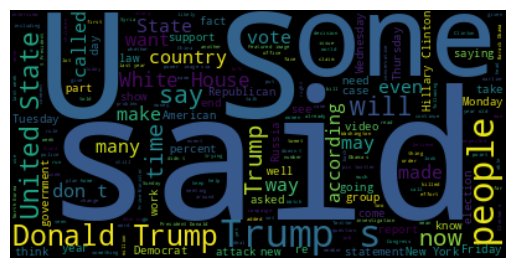

In [7]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
data_df.sample(5)

,text,target,label
36119,19:17 (IST) Sep 20 The second round of country...,REAL,1
20438,All we can say about this development is that ...,FAKE,0
27803,(U.S. President Donald Trump is weeks away fro...,REAL,1
4884,This has to be the most counter-intuitive and ...,FAKE,0
7426,Last week the Commerce Department released its...,FAKE,0


In [9]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall


  Using cached spacy-2.2.3.tar.gz (5.9 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 134.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restar

In [10]:
!pip install googletrans==4.0.0-rc1


In [11]:
import preprocess_kgptalkie as ps
ps.download_nltk_data()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
data_df['text'] = data_df['text'].apply(lambda x: ps.remove_special_chars(x))

# Vectorization -- Word2Vec


In [13]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 59.3 MB/s eta 0:00:00


In [14]:
import gensim

In [15]:
y = data_df['label'].values

In [16]:
X = [d.split() for d in data_df['text'].tolist()]

In [17]:
type(X[0])

list

In [18]:
DIM = 100 #conversion to sequence of 100 vectors
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1) # window-> gonna take 5 words in sequence, min_count -> even if one word... vector will be generated

In [19]:
len(w2v_model.wv.key_to_index)

272677

In [22]:
w2v_model.wv.most_similar('trump')

[('2016realDonaldTrump', 0.6651325225830078),
 ('realDonaldTrump', 0.6417303681373596),
 ('Muscato', 0.6382365226745605),
 ('TrumpFeatured', 0.6358300447463989),
 ('2016Trump', 0.6258910298347473),
 ('Kalb', 0.6257049441337585),
 ('Bess', 0.6222999691963196),
 ('DollHanded', 0.612616777420044),
 ('fucking', 0.6078542470932007),
 ('Olbermann', 0.6056221127510071)]

In [24]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [25]:
X = tokenizer.texts_to_sequences(X)

In [26]:
#tokenizer.word_index


{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'is': 9,
 'for': 10,
 's': 11,
 'he': 12,
 'said': 13,
 'it': 14,
 'with': 15,
 'was': 16,
 'trump': 17,
 'as': 18,
 'by': 19,
 'his': 20,
 'has': 21,
 'from': 22,
 'be': 23,
 'have': 24,
 'not': 25,
 'at': 26,
 'this': 27,
 'are': 28,
 'who': 29,
 'an': 30,
 'they': 31,
 'us': 32,
 'we': 33,
 'but': 34,
 'i': 35,
 'would': 36,
 'will': 37,
 'about': 38,
 'president': 39,
 'had': 40,
 'their': 41,
 'been': 42,
 'you': 43,
 'were': 44,
 'people': 45,
 't': 46,
 'which': 47,
 'more': 48,
 'or': 49,
 'she': 50,
 'after': 51,
 'her': 52,
 'one': 53,
 'also': 54,
 'its': 55,
 'out': 56,
 'if': 57,
 'all': 58,
 'when': 59,
 'what': 60,
 'state': 61,
 'new': 62,
 'there': 63,
 'up': 64,
 'no': 65,
 'over': 66,
 'can': 67,
 'government': 68,
 'states': 69,
 'our': 70,
 'house': 71,
 'donald': 72,
 'other': 73,
 'him': 74,
 'so': 75,
 'than': 76,
 'clinton': 77,
 'some': 78,
 'just': 79,
 'obama': 80,
 'could': 

(array([1.880e+02, 5.110e+02, 4.340e+02, 5.310e+02, 6.420e+02, 1.102e+03,
        1.165e+03, 9.330e+02, 8.760e+02, 6.690e+02, 6.260e+02, 5.260e+02,
        4.290e+02, 5.650e+02, 4.540e+02, 5.690e+02, 6.130e+02, 6.420e+02,
        9.030e+02, 6.550e+02, 7.200e+02, 7.560e+02, 7.720e+02, 9.070e+02,
        7.190e+02, 9.200e+02, 1.147e+03, 1.005e+03, 1.263e+03, 1.169e+03,
        1.193e+03, 1.209e+03, 1.096e+03, 1.349e+03, 1.363e+03, 1.040e+03,
        9.810e+02, 8.490e+02, 8.140e+02, 6.750e+02, 7.220e+02, 7.420e+02,
        6.410e+02, 6.230e+02, 5.700e+02, 5.730e+02, 5.850e+02, 4.400e+02,
        4.680e+02, 3.610e+02, 4.630e+02, 3.980e+02, 3.490e+02, 3.740e+02,
        3.590e+02, 3.320e+02, 3.570e+02, 2.980e+02, 2.990e+02, 2.840e+02,
        2.320e+02, 2.640e+02, 2.030e+02, 2.070e+02, 2.030e+02, 2.150e+02,
        1.910e+02, 1.800e+02, 2.350e+02, 1.950e+02, 1.770e+02, 1.580e+02,
        1.590e+02, 1.570e+02, 1.400e+02, 1.750e+02, 1.030e+02, 1.360e+02,
        9.300e+01, 8.900e+01, 8.900e+0

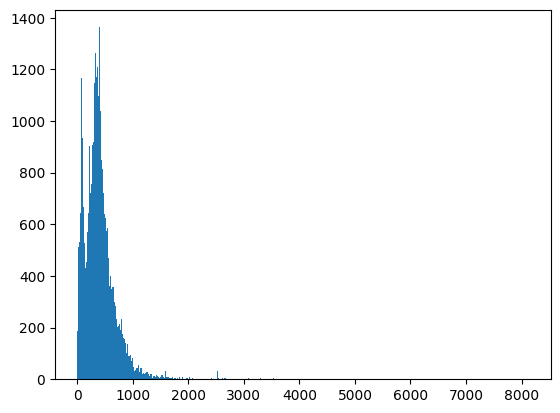

In [27]:
plt.hist([len(x) for x in X], bins = 700)

In [28]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1601

In [30]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [31]:
len(X[101])

1000

In [34]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [40]:
def get_weights(model):
    weight_matrix = np.zeros((vocab_size, DIM))

    for word, i in vocab.items():
        if word in model.wv:
            weight_matrix[i] = model.wv[word]
        else:
            weight_matrix[i] = np.zeros(DIM)
    return weight_matrix


In [41]:
embedding_vectors = get_weights(w2v_model)

In [42]:
embedding_vectors.shape

(242669, 100)

In [45]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units = 128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │    24,266,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,266,900 (92.57 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 24,266,900 (92.57 MB)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [48]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
785/785 ━━━━━━━━━━━━━━━━━━━━ 35s 40ms/step - accuracy: 0.9010 - loss: 0.2451 - val_accuracy: 0.9410 - val_loss: 0.1564
Epoch 2/6
785/785 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9690 - loss: 0.0861 - val_accuracy: 0.9830 - val_loss: 0.0502
Epoch 3/6
785/785 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9851 - loss: 0.0468 - val_accuracy: 0.9798 - val_loss: 0.0583
Epoch 4/6
785/785 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.9842 - loss: 0.0489 - val_accuracy: 0.9839 - val_loss: 0.0481
Epoch 5/6
785/785 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9922 - loss: 0.0260 - val_accuracy: 0.9867 - val_loss: 0.0418
Epoch 6/6
785/785 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.9929 - loss: 0.0222 - val_accuracy: 0.9873 - val_loss: 0.0434


In [49]:
y_pred = (model.predict(X_test) >= 0.5).astype("int")

374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


In [50]:
accuracy_score(y_test, y_pred)

0.9857847646124258

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6212
           1       0.99      0.98      0.99      5747

    accuracy                           0.99     11959
   macro avg       0.99      0.99      0.99     11959
weighted avg       0.99      0.99      0.99     11959



In [53]:
X_test

array([[    0,     0,     0, ..., 11987,    19, 11701],
       [    0,     0,     0, ...,   265,  1162,    87],
       [    0,     0,     0, ...,  2662,    49,  1619],
       ...,
       [    0,     0,     0, ...,    68,   163,    13],
       [    0,     0,     0, ...,    25,   375,   835],
       [    0,     0,     0, ...,     3, 14577,   912]], dtype=int32)

In [61]:
x = ['Eight people have been killed and 14 others injured after a passenger train hit a goods train near Bilaspur station in Chhattisgarh on Tuesday evening. The incident took place around 4 pm, and the railways have moved all the resources to the spot. The Railway PRO said that all measures are being taken for the treatment of the injured.']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [62]:
model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[0.9984314]], dtype=float32)

In [72]:
x = ['Prime minister Modi announced freebies for all the voters in the country']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [73]:
model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[0.13335943]], dtype=float32)

In [74]:
model.save("my_model.keras")

In [75]:
from google.colab import files
files.download("my_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>